<a href="https://colab.research.google.com/github/austin-ash/CS_167_Classwork/blob/main/Day10_Notes_sklearn_f21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 10 Notes: Introduction to [Scikit-Learn](https://scikit-learn.org/stable/modules/classes.html)

The overall algorithm for scikit-learn (sklearn) is:
1. Load data
2. Split Data: use `train_test_split()`
3. Create a classifier/regressor object
4. Call `fit()` (to train the model)
5. Call `predict()` to get the predictions
6. Call a metric function to measure performance

In the cell below, we do steps 0-2:

In [4]:
# Mount your drive
from google.colab import drive
drive.mount('/content/drive')

#classic scikit-learn algorithm

#0. import libraries
import sklearn
import pandas
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors

#1. load data
iris_data = pandas.read_csv('/content/drive/MyDrive/CS167/datasets/irisData.csv')

#2. split data
predictors = ['sepal length', 'sepal width','petal length', 'petal width']
target = "species"
train_data, test_data, train_sln, test_sln = \
        train_test_split(iris_data[predictors], iris_data[target], test_size = 0.2, random_state=41)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [5]:
# take a look at the data... make sure you understand what split of data is stored in each 
print('train_data shape: ',train_data.shape)
print('test_data shape: ',test_data.shape)
print('train_sln shape: ',train_sln.shape)
print('test_sln shape: ',test_sln.shape)

print(train_data.head())
print(test_data.head())
print(train_sln.head())
print(test_sln.head())


train_data shape:  (120, 4)
test_data shape:  (30, 4)
train_sln shape:  (120,)
test_sln shape:  (30,)
     sepal length  sepal width  petal length  petal width
79            5.7          2.6           3.5          1.0
54            6.5          2.8           4.6          1.5
106           4.9          2.5           4.5          1.7
90            5.5          2.6           4.4          1.2
145           6.7          3.0           5.2          2.3
     sepal length  sepal width  petal length  petal width
119           6.0          2.2           5.0          1.5
128           6.4          2.8           5.6          2.1
135           7.7          3.0           6.1          2.3
91            6.1          3.0           4.6          1.4
112           6.8          3.0           5.5          2.1
79     Iris-versicolor
54     Iris-versicolor
106     Iris-virginica
90     Iris-versicolor
145     Iris-virginica
Name: species, dtype: object
119     Iris-virginica
128     Iris-virginica
135     Iris

In [6]:
#3. Create classifier/regressor object (change these parameters for Exercise #1)
dt = tree.DecisionTreeClassifier()

#4. Call fit (to train the classification/regression model)
dt.fit(train_data,train_sln)

#5. Call predict to generate predictions
iris_predictions = dt.predict(test_data)

#6. Call a metric function to measure performance
print("Accuracy:", metrics.accuracy_score(test_sln,iris_predictions))

# Show the acutal and predicted (this isn't necessary, but may help catch bugs)
print("___PREDICTED___ \t  ___ACTUAL___")
for i in range(len(test_sln)):
    print(iris_predictions[i],"\t\t", test_sln.iloc[i])

print("-------------------------------------------------------")
#print out a confusion matrix
iris_labels= ["Iris-setosa", "Iris-versicolor","Iris-virginica"]
conf_mat = metrics.confusion_matrix(test_sln, iris_predictions, labels=iris_labels)
print(pandas.DataFrame(conf_mat,index = iris_labels, columns = iris_labels))

Accuracy: 0.9
___PREDICTED___ 	  ___ACTUAL___
Iris-versicolor 		 Iris-virginica
Iris-virginica 		 Iris-virginica
Iris-virginica 		 Iris-virginica
Iris-versicolor 		 Iris-versicolor
Iris-virginica 		 Iris-virginica
Iris-versicolor 		 Iris-versicolor
Iris-virginica 		 Iris-virginica
Iris-versicolor 		 Iris-versicolor
Iris-virginica 		 Iris-virginica
Iris-virginica 		 Iris-virginica
Iris-virginica 		 Iris-virginica
Iris-setosa 		 Iris-setosa
Iris-setosa 		 Iris-setosa
Iris-versicolor 		 Iris-versicolor
Iris-setosa 		 Iris-setosa
Iris-versicolor 		 Iris-virginica
Iris-setosa 		 Iris-setosa
Iris-virginica 		 Iris-versicolor
Iris-setosa 		 Iris-setosa
Iris-setosa 		 Iris-setosa
Iris-versicolor 		 Iris-versicolor
Iris-virginica 		 Iris-virginica
Iris-setosa 		 Iris-setosa
Iris-setosa 		 Iris-setosa
Iris-versicolor 		 Iris-versicolor
Iris-versicolor 		 Iris-versicolor
Iris-versicolor 		 Iris-versicolor
Iris-versicolor 		 Iris-versicolor
Iris-setosa 		 Iris-setosa
Iris-versicolor 		 Iris-versic

In [26]:
# all together now: 
#classic scikit-learn algorithm

#0. import libraries
import sklearn
import pandas
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors

#1. load data
iris_data = pandas.read_csv('/content/drive/MyDrive/CS167/datasets/irisData.csv')

#2. split data
predictors = ['sepal length', 'sepal width','petal length', 'petal width']
target = "species"
train_data, test_data, train_sln, test_sln = \
        train_test_split(iris_data[predictors], iris_data[target], test_size = 0.2, random_state=41)

#3. Create classifier/regressor object (change these parameters for Exercise #1)
dt = tree.DecisionTreeClassifier()

#4. Call fit (to train the classification/regression model)
dt.fit(train_data,train_sln)

#5. Call predict to generate predictions
iris_predictions = dt.predict(test_data)

#6. Call a metric function to measure performance
print("Accuracy:", metrics.accuracy_score(test_sln,iris_predictions))

# Show the acutal and predicted (this isn't necessary, but may help catch bugs)
print("___PREDICTED___ \t  ___ACTUAL___")
for i in range(len(test_sln)):
    print(iris_predictions[i],"\t\t", test_sln.iloc[i])

print("-------------------------------------------------------")
#print out a confusion matrix
iris_labels= ["Iris-setosa", "Iris-versicolor","Iris-virginica"]
conf_mat = metrics.confusion_matrix(test_sln, iris_predictions, labels=iris_labels)
print(pandas.DataFrame(conf_mat,index = iris_labels, columns = iris_labels))

Accuracy: 0.9
___PREDICTED___ 	  ___ACTUAL___
Iris-versicolor 		 Iris-virginica
Iris-virginica 		 Iris-virginica
Iris-virginica 		 Iris-virginica
Iris-versicolor 		 Iris-versicolor
Iris-virginica 		 Iris-virginica
Iris-versicolor 		 Iris-versicolor
Iris-virginica 		 Iris-virginica
Iris-versicolor 		 Iris-versicolor
Iris-virginica 		 Iris-virginica
Iris-virginica 		 Iris-virginica
Iris-virginica 		 Iris-virginica
Iris-setosa 		 Iris-setosa
Iris-setosa 		 Iris-setosa
Iris-versicolor 		 Iris-versicolor
Iris-setosa 		 Iris-setosa
Iris-versicolor 		 Iris-virginica
Iris-setosa 		 Iris-setosa
Iris-virginica 		 Iris-versicolor
Iris-setosa 		 Iris-setosa
Iris-setosa 		 Iris-setosa
Iris-versicolor 		 Iris-versicolor
Iris-virginica 		 Iris-virginica
Iris-setosa 		 Iris-setosa
Iris-setosa 		 Iris-setosa
Iris-versicolor 		 Iris-versicolor
Iris-versicolor 		 Iris-versicolor
Iris-versicolor 		 Iris-versicolor
Iris-versicolor 		 Iris-versicolor
Iris-setosa 		 Iris-setosa
Iris-versicolor 		 Iris-versic

## Exercise #1

- Experiment with different random_states
- Explore different parameters you could use in the DecisionTreeClassifier
- Can you improve the 90% accuracy with random_state = 41?
- What happens when you do this? Why?


In [24]:
# code for Exercise #1: DIFFERENT RANDOM STATE
#1. load data
iris_data = pandas.read_csv('/content/drive/MyDrive/CS167/datasets/irisData.csv')

#2. split data
predictors = ['sepal length', 'sepal width','petal length', 'petal width']
target = "species"
train_data, test_data, train_sln, test_sln = \
        train_test_split(iris_data[predictors], iris_data[target], test_size = 0.2, random_state=41)

#3. Create classifier/regressor object (change these parameters for Exercise #1)
dt = tree.DecisionTreeClassifier(criterion="entropy", max_depth=2, max_leaf_nodes=2)

#4. Call fit (to train the classification/regression model)
dt.fit(train_data,train_sln)

#5. Call predict to generate predictions
iris_predictions = dt.predict(test_data)

#6. Call a metric function to measure performance
print("Accuracy:", metrics.accuracy_score(test_sln,iris_predictions))

# Show the acutal and predicted (this isn't necessary, but may help catch bugs)
print("___PREDICTED___ \t  ___ACTUAL___")
for i in range(len(test_sln)):
    print(iris_predictions[i],"\t\t", test_sln.iloc[i])

print("-------------------------------------------------------")
#print out a confusion matrix
iris_labels= ["Iris-setosa", "Iris-versicolor","Iris-virginica"]
conf_mat = metrics.confusion_matrix(test_sln, iris_predictions, labels=iris_labels)
print(pandas.DataFrame(conf_mat,index = iris_labels, columns = iris_labels))

Accuracy: 0.8333333333333334
___PREDICTED___ 	  ___ACTUAL___
Iris-versicolor 		 Iris-virginica
Iris-virginica 		 Iris-virginica
Iris-virginica 		 Iris-virginica
Iris-versicolor 		 Iris-versicolor
Iris-virginica 		 Iris-virginica
Iris-versicolor 		 Iris-versicolor
Iris-virginica 		 Iris-virginica
Iris-virginica 		 Iris-versicolor
Iris-virginica 		 Iris-virginica
Iris-virginica 		 Iris-virginica
Iris-virginica 		 Iris-virginica
Iris-setosa 		 Iris-setosa
Iris-setosa 		 Iris-setosa
Iris-versicolor 		 Iris-versicolor
Iris-setosa 		 Iris-setosa
Iris-versicolor 		 Iris-virginica
Iris-setosa 		 Iris-setosa
Iris-virginica 		 Iris-versicolor
Iris-setosa 		 Iris-setosa
Iris-setosa 		 Iris-setosa
Iris-versicolor 		 Iris-versicolor
Iris-virginica 		 Iris-virginica
Iris-setosa 		 Iris-setosa
Iris-setosa 		 Iris-setosa
Iris-versicolor 		 Iris-versicolor
Iris-versicolor 		 Iris-versicolor
Iris-virginica 		 Iris-versicolor
Iris-versicolor 		 Iris-versicolor
Iris-setosa 		 Iris-setosa
Iris-versicolor 	

# CONCLUSIONS

At random state = 26 and with all else held equal, accuracy increases from 90% to 96.67%. Some random states result in 100% accuracy

With random state = 41, I increased the test size from 20% various times and the accuracy typically stayed around 90%, but it decreased significantly after I increased the test size to larger than 95%.

When I changed the parameters in the dt = tree.DecisionTreeClassifier() to criterion="entropy", max_depth=2, max_leaf_nodes=3, the accuracy decreased. max_depth = 2 means it can only go 2 down. max_leaf_nodes = 2 means the tree can only produce 2 leaf nodes.

## Plotting Decision Trees


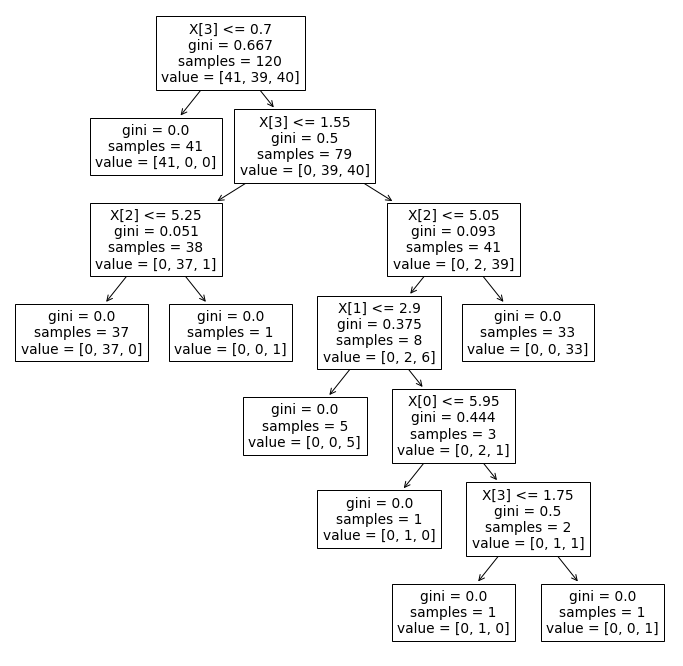

In [27]:
# visualizing decision tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12)) # Makes is to the graph isn't tiny
tree.plot_tree(dt); #if you remove the ;, you'll get more information about the tree

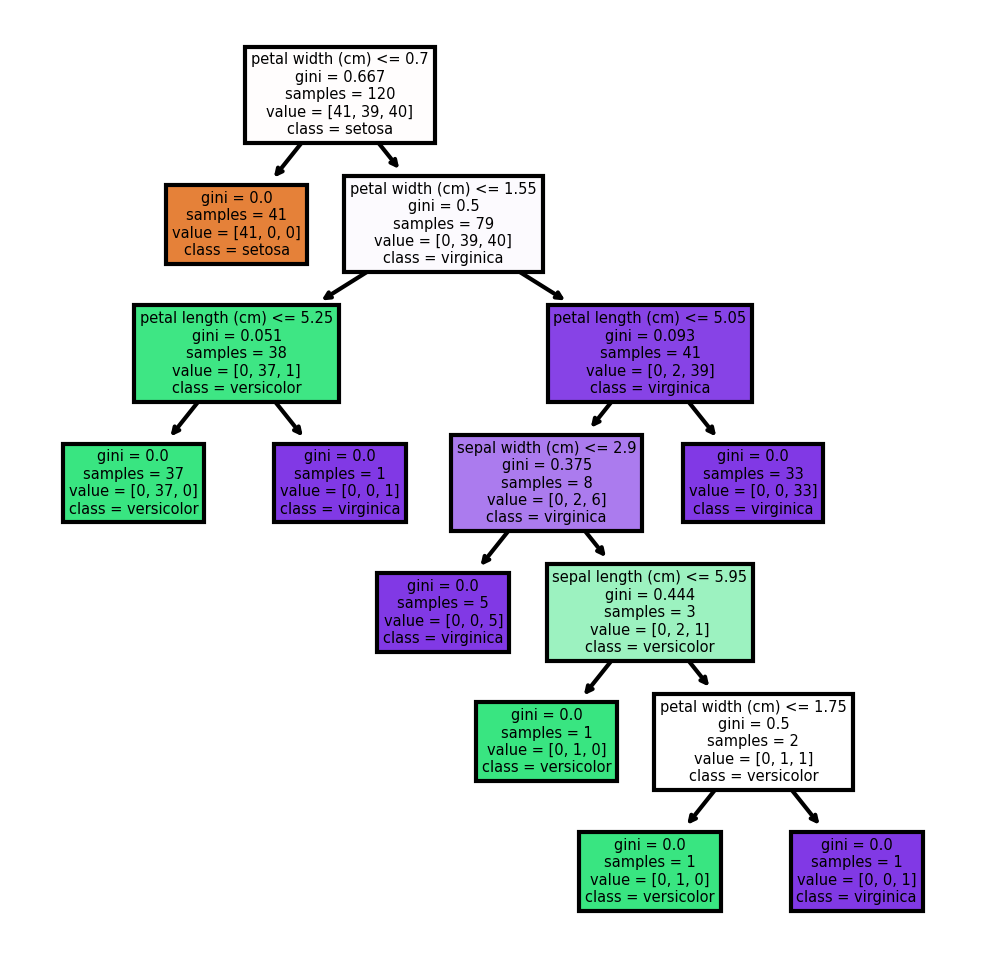

In [28]:
#tweak paramters to make it pretty
import matplotlib.pyplot as plt
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dt,
               feature_names = fn, 
               class_names=cn,
               filled = True);

Text(0.5, 0, 'Predicted label')

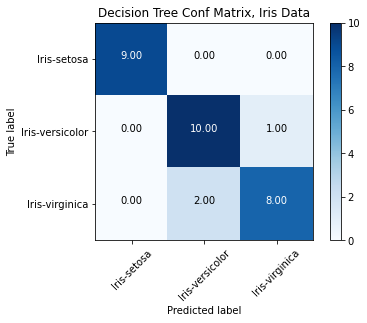

In [29]:
# a pretty confusion matrix
import itertools

cm=metrics.confusion_matrix(test_sln,iris_predictions)
plt.imshow(cm, interpolation='nearest',cmap=plt.cm.Blues)
plt.title('Decision Tree Conf Matrix, Iris Data')
plt.colorbar()
plt.xticks([0,1,2], dt.classes_,rotation=45)
plt.yticks([0,1,2], dt.classes_)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f'),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')

## Exercise #2:
With the aid of the documentation, try the following:
- Create a decision tree with an early stopping parameter
- Visualize your trees to see if it is working right.
- Look at your performance metrics to see how it changes performance.
- Determine which of the features (petal length, sepal length, etc) were the most important. How does it determine these numbers?


In [39]:
# code for exercise #2
#1. load data
iris_data = pandas.read_csv('/content/drive/MyDrive/CS167/datasets/irisData.csv')

#2. split data
predictors = ['sepal length', 'sepal width','petal length', 'petal width']
target = "species"
train_data, test_data, train_sln, test_sln = \
        train_test_split(iris_data[predictors], iris_data[target], test_size = 0.2, random_state=41)

#3. Create classifier/regressor object (change these parameters for Exercise #1)
dt = tree.DecisionTreeClassifier(criterion="gini", max_depth=2, max_leaf_nodes=3)

#4. Call fit (to train the classification/regression model)
dt.fit(train_data,train_sln)

#5. Call predict to generate predictions
iris_predictions = dt.predict(test_data)

#6. Call a metric function to measure performance
print("Accuracy:", metrics.accuracy_score(test_sln,iris_predictions))

# Show the acutal and predicted (this isn't necessary, but may help catch bugs)
print("___PREDICTED___ \t  ___ACTUAL___")
for i in range(len(test_sln)):
    print(iris_predictions[i],"\t\t", test_sln.iloc[i])

Accuracy: 0.8333333333333334
___PREDICTED___ 	  ___ACTUAL___
Iris-versicolor 		 Iris-virginica
Iris-virginica 		 Iris-virginica
Iris-virginica 		 Iris-virginica
Iris-versicolor 		 Iris-versicolor
Iris-virginica 		 Iris-virginica
Iris-versicolor 		 Iris-versicolor
Iris-virginica 		 Iris-virginica
Iris-virginica 		 Iris-versicolor
Iris-virginica 		 Iris-virginica
Iris-virginica 		 Iris-virginica
Iris-virginica 		 Iris-virginica
Iris-setosa 		 Iris-setosa
Iris-setosa 		 Iris-setosa
Iris-versicolor 		 Iris-versicolor
Iris-setosa 		 Iris-setosa
Iris-versicolor 		 Iris-virginica
Iris-setosa 		 Iris-setosa
Iris-virginica 		 Iris-versicolor
Iris-setosa 		 Iris-setosa
Iris-setosa 		 Iris-setosa
Iris-versicolor 		 Iris-versicolor
Iris-virginica 		 Iris-virginica
Iris-setosa 		 Iris-setosa
Iris-setosa 		 Iris-setosa
Iris-versicolor 		 Iris-versicolor
Iris-versicolor 		 Iris-versicolor
Iris-virginica 		 Iris-versicolor
Iris-versicolor 		 Iris-versicolor
Iris-setosa 		 Iris-setosa
Iris-versicolor 	

<Figure size 864x864 with 0 Axes>

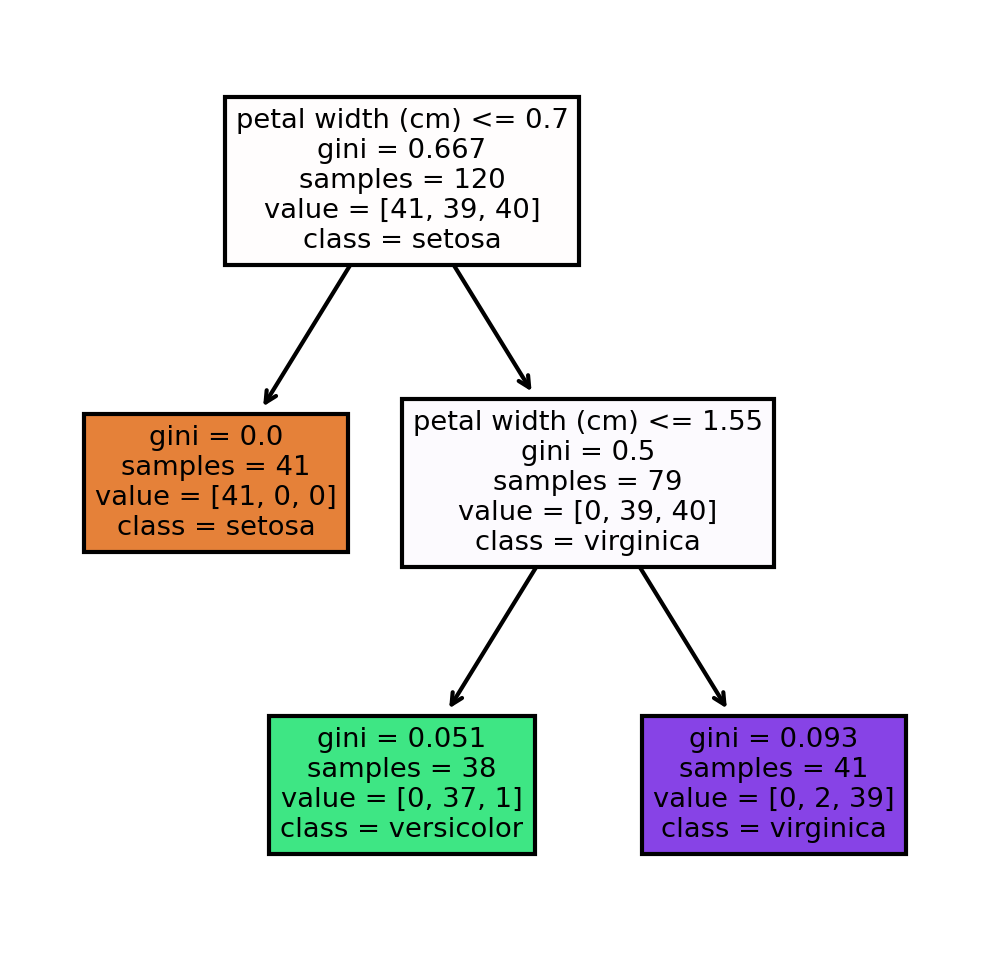

In [40]:
# visualizing decision tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12)) # Makes is to the graph isn't tiny

#tweak paramters to make it pretty
import matplotlib.pyplot as plt
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dt,
               feature_names = fn, 
               class_names=cn,
               filled = True);

**Petal length and width are the most important statistics**

## Exercise #3
Check out the scikit-learn documentation [here](https://scikit-learn.org/stable/modules/classes.html):

Find the documentation for the kNN classifier (i.e., the classifier, not an unsupervised algorithm). Answer the following questions:
- What is the default value of k it uses?
      Default k = 5
- Does it do weighted or unweighted kNN by default?
      Unweighted by default
- What is the accuracy on the Iris dataset for k = 100, both weighted and unweighted?
      Weighted: 93.33%
      Unweighted: 80%
- How do the weighted and unweighted versions do for small values of k?
      At k = 5, they both produced the same results with a few different random states


In [47]:
# CODE FOR EXERCISE #3
#1. load data
iris_data = pandas.read_csv('/content/drive/MyDrive/CS167/datasets/irisData.csv')

#2. split data
predictors = ['sepal length', 'sepal width','petal length', 'petal width']
target = "species"
train_data, test_data, train_sln, test_sln = \
        train_test_split(iris_data[predictors], iris_data[target], test_size = 0.2, random_state=26)

#3. Create classifier/regressor object
kNN = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')

#4. Call fit (to train the classification/regression model)
kNN.fit(train_data,train_sln)

#5. Call predict to generate predictions
kNN_iris_predictions = kNN.predict(test_data)

#6. Call a metric function to measure performance
print("Accuracy:", metrics.accuracy_score(test_sln,kNN_iris_predictions))

# Show the acutal and predicted (this isn't necessary, but may help catch bugs)
print("___PREDICTED___ \t  ___ACTUAL___")
for i in range(len(test_sln)):
    print(kNN_iris_predictions[i],"\t\t", test_sln.iloc[i])

Accuracy: 0.9666666666666667
___PREDICTED___ 	  ___ACTUAL___
Iris-versicolor 		 Iris-versicolor
Iris-versicolor 		 Iris-versicolor
Iris-setosa 		 Iris-setosa
Iris-setosa 		 Iris-setosa
Iris-virginica 		 Iris-virginica
Iris-versicolor 		 Iris-versicolor
Iris-setosa 		 Iris-setosa
Iris-virginica 		 Iris-virginica
Iris-virginica 		 Iris-virginica
Iris-virginica 		 Iris-virginica
Iris-setosa 		 Iris-setosa
Iris-versicolor 		 Iris-versicolor
Iris-versicolor 		 Iris-versicolor
Iris-setosa 		 Iris-setosa
Iris-versicolor 		 Iris-versicolor
Iris-setosa 		 Iris-setosa
Iris-virginica 		 Iris-virginica
Iris-versicolor 		 Iris-versicolor
Iris-virginica 		 Iris-virginica
Iris-setosa 		 Iris-setosa
Iris-setosa 		 Iris-setosa
Iris-virginica 		 Iris-virginica
Iris-virginica 		 Iris-virginica
Iris-virginica 		 Iris-virginica
Iris-virginica 		 Iris-virginica
Iris-versicolor 		 Iris-virginica
Iris-versicolor 		 Iris-versicolor
Iris-setosa 		 Iris-setosa
Iris-setosa 		 Iris-setosa
Iris-virginica 		 Iris-vi

## Let's try regression now:


In [48]:
# load in the vehicles.csv data for scikit learn
import pandas
import numpy

# load data, get the right subset
data = pandas.read_csv('/content/drive/MyDrive/CS167/datasets/vehicles.csv')
gas_vehicles = data[data['fuelType']=='Regular'][['year', 'cylinders', 'displ', 'comb08']]
gas_vehicles.dropna(inplace=True)

# set the predictor variables and target variable
predictors= ['year', 'cylinders', 'displ']
target= 'comb08'

# use train_test_split() to split the data
train_data, test_data, train_sln, test_sln = train_test_split(gas_vehicles[predictors], gas_vehicles[target], test_size = 0.2, random_state=41)
train_data

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,year,cylinders,displ
4256,1985,4.0,2.2
2685,1995,6.0,4.0
35058,2020,6.0,4.3
10678,1986,6.0,2.8
18702,1984,8.0,5.0
...,...,...,...
11900,2005,4.0,1.7
35733,1988,4.0,1.5
33368,2019,4.0,2.0
1156,1994,4.0,2.5


In [ ]:
from sklearn import neighbors
# create our model
neigh = neighbors.KNeighborsRegressor()

# fit (train) the model to the data
neigh.fit(train_data, train_sln)

# use the trained model to get predictions from our test_data
predictions = neigh.predict(test_data)

# use a metric to see how good our predictions are
print('MSE: ', metrics.mean_squared_error(test_sln, predictions))
print('r2: ', metrics.r2_score(test_sln, predictions))

MSE:  6.798711839166046
r2:  0.7738706905208238


In [ ]:
# Normalization code using StandardScaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data_normalized = scaler.transform(train_data)
test_data_normalized = scaler.transform(test_data)


## Exercise #3
Look up an appropriate Decision Tree algorithm and apply it to the vehicles data:
- https://scikit-learn.org/stable/modules/classes.html 
- Using Default values of the decision tree, what is the R squared metric?
- Is this good or bad?


In [ ]:
# code for exercise #3



## Exercise #4
Change your decision tree to have a max_depth of 3
- Does this help or hurt the decision tree performance?

Compare to a knn algorithm
- What values of k seem to help the performance?
- What else can you do to help the performance?

Can you get a higher R^2 value using a knn algorithm or a decision tree?
- What does this indicate about the data?
